In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option('display.max.column', None)
sns.set()

## Analysis Overview
### Analisa ini akan menjawab pertanyaan
1. bagaimana kebiasaan kegiatan kriminal ?  

### Untuk menjawab pertanyaan tersebut analisa ini berfokus pada beberapa variabel
Independent Variabel :  
    1. Tipe kegiatan kriminal  
      
Dependent Variabel :  
    1. Nama kegiatan kriminal  
    2. Kota kegiatan kriminal dilakukan   
    3. Tempat kegiatan kriminal dilakukan  
    4. Waktu kegiatan kriminal dilakukan  
    5. Durasi kegiatan kriminal  

In [3]:
data = pd.read_csv('Crime.csv', low_memory=False)

In [4]:
data.columns

Index(['Incident ID', 'Offence Code', 'CR Number', 'Dispatch Date / Time',
       'NIBRS Code', 'Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3',
       'Police District Name', 'Block Address', 'City', 'State', 'Zip Code',
       'Agency', 'Place', 'Sector', 'Beat', 'PRA', 'Address Number',
       'Street Prefix', 'Street Name', 'Street Suffix', 'Street Type',
       'Start_Date_Time', 'End_Date_Time', 'Latitude', 'Longitude',
       'Police District Number', 'Location'],
      dtype='object')

In [5]:
data.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201202980,3550,180042096,08/23/2018 09:52:08 PM,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,NaN,MIDDLEBROOK,NaN,RD,08/23/2018 09:52:00 PM,NaN,39.177744,-77.265619,5D,"(39.1777, -77.2656)"
1,201181293,3522,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
2,201181293,3562,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
3,201193163,3520,180029476,06/14/2018 10:26:45 PM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,NaN,QUINCE ORCHARD,NaN,RD,06/14/2018 10:26:00 PM,06/15/2018 03:00:00 AM,39.147954,-77.218189,6D,"(39.148, -77.2182)"
4,201204355,2204,180043926,09/03/2018 12:06:54 PM,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,NaN,FALSTONE,NaN,AVE,09/02/2018 11:30:00 PM,09/03/2018 12:30:00 AM,38.966174,-77.096561,2D,"(38.9662, -77.0966)"


## Cleaning data
1. menghapus atau mengecualikan tipe kriminal "Not a Crime" karena bukan merupakan tindak kriminal
2. merubah format waktu pada dataframe menjadi date time agar lebih mudah di olah  
3. menambahkan kolom baru yaitu bulan, hari, tanggal, waktu, dan durasi  
4. menambahkan kolom count untuk mempermudah dalam menghitung
5. membuat data frame baru dengan mengklasifikasikan jenis jenis kegiatan kriminal

In [6]:
df = data[data['Crime Name1']!='Not a Crime']

In [7]:
df['Dispatch Date / Time'] = pd.to_datetime(df['Dispatch Date / Time'])
df['Start_Date_Time'] = pd.to_datetime(df['Start_Date_Time'])
df['End_Date_Time'] = pd.to_datetime(df['End_Date_Time'])

C:\Users\HP\AppData\Local\Temp\ipykernel_9708\1785481473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dispatch Date / Time'] = pd.to_datetime(df['Dispatch Date / Time'])
C:\Users\HP\AppData\Local\Temp\ipykernel_9708\1785481473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Start_Date_Time'] = pd.to_datetime(df['Start_Date_Time'])
C:\Users\HP\AppData\Local\Temp\ipykernel_9708\1785481473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [8]:
df['Month'] = df['Start_Date_Time'].dt.month
df['Day'] = df['Start_Date_Time'].dt.day_name()
df['Time'] = df['Start_Date_Time'].dt.time
df['Date'] = df['Start_Date_Time'].dt.date
df['Duration'] = df['End_Date_Time'] - df['Start_Date_Time']
df['count'] = 1

C:\Users\HP\AppData\Local\Temp\ipykernel_9708\2192255877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Start_Date_Time'].dt.month
C:\Users\HP\AppData\Local\Temp\ipykernel_9708\2192255877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Start_Date_Time'].dt.day_name()
C:\Users\HP\AppData\Local\Temp\ipykernel_9708\2192255877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302519 entries, 0 to 306093
Data columns (total 36 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Incident ID             302519 non-null  int64          
 1   Offence Code            302519 non-null  object         
 2   CR Number               302519 non-null  int64          
 3   Dispatch Date / Time    254054 non-null  datetime64[ns] 
 4   NIBRS Code              302519 non-null  object         
 5   Victims                 302519 non-null  int64          
 6   Crime Name1             302247 non-null  object         
 7   Crime Name2             302247 non-null  object         
 8   Crime Name3             302247 non-null  object         
 9   Police District Name    302425 non-null  object         
 10  Block Address           276320 non-null  object         
 11  City                    301245 non-null  object         
 12  State           

In [10]:
Crime_Against_Property = df[df['Crime Name1']=='Crime Against Property']
Crime_Against_Society = df[df['Crime Name1']=='Crime Against Society']
Other = df[df['Crime Name1']=='Other']
Crime_Against_Person  = df[df['Crime Name1']=='Crime Against Person']

# Jenis dan Jumlah Kegiatan Kriminal

In [11]:
df['Crime Name1'].value_counts()

Crime Against Property    139882
Crime Against Society      68917
Other                      63178
Crime Against Person       30270
Name: Crime Name1, dtype: int64

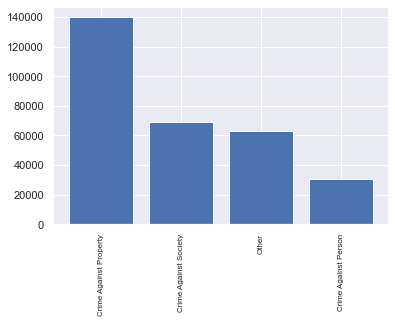

In [12]:
x = df['Crime Name1'].value_counts()
x = pd.DataFrame(x)

plt.bar(x.index,x['Crime Name1'])
plt.xticks(x.index, rotation='vertical',size=8)
plt.show()

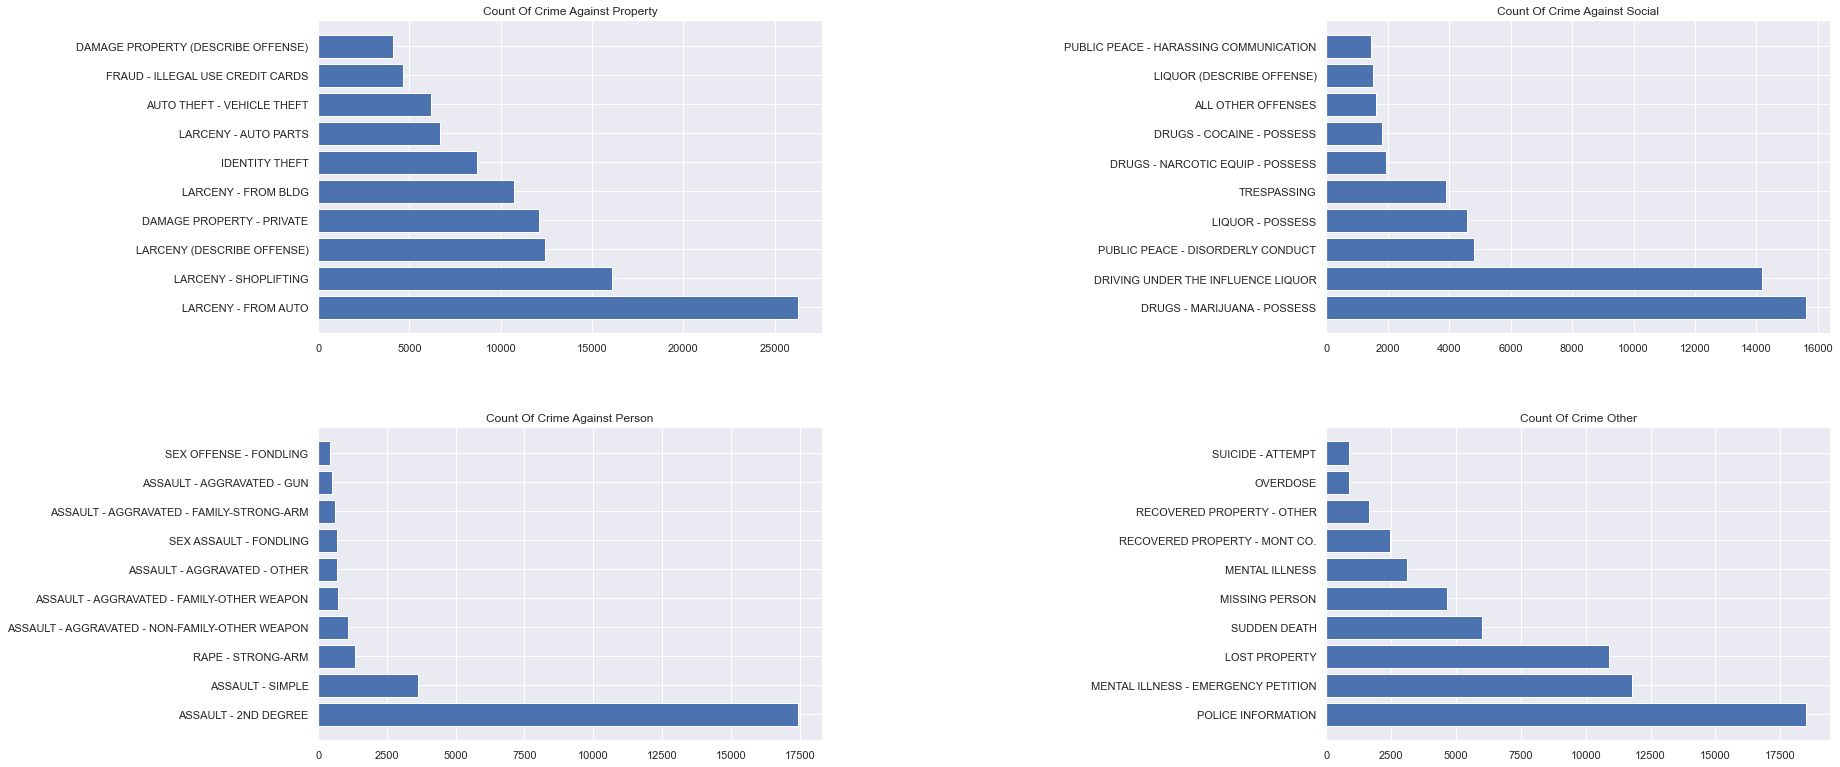

In [13]:
capro = Crime_Against_Property['Crime Name3'].value_counts().head(10)
casos = Crime_Against_Society['Crime Name3'].value_counts().head(10)
ot = Other['Crime Name3'].value_counts().head(10)
caper = Crime_Against_Person['Crime Name3'].value_counts().head(10)

capro = pd.DataFrame(capro)
casos = pd.DataFrame(casos)
ot = pd.DataFrame(ot)
caper = pd.DataFrame(caper)

figure, axis = plt.subplots(2, 2)

axis[0, 0].barh(capro.index, capro['Crime Name3'])
axis[0, 0].set_title('Count Of Crime Against Property')
#axis[0, 1].tick_params(labelrotation=90)

axis[0, 1].barh(casos.index, casos['Crime Name3'])
axis[0, 1].set_title('Count Of Crime Against Social')
#axis[0, 2].tick_params(labelrotation=90)

axis[1, 0].barh(caper.index, caper['Crime Name3'])
axis[1, 0].set_title('Count Of Crime Against Person')
#axis[1, 0].tick_params(labelrotation=90)

axis[1, 1].barh(ot.index, ot['Crime Name3'])
axis[1, 1].set_title('Count Of Crime Other')
#axis[1, 1].tick_params(labelrotation=90)


plt.subplots_adjust(left=0, bottom=0.5,right=3.5,top=3,wspace=1,hspace=0.3)
plt.show()

#### Analisa pada Jenis dan Jumlah kegiatan kriminal yang terjadi
dari data diketahui jumlah kegiatan kriminal yang terjadi ada 305822:  
    1. Crime Againts Property = 139882  
    2. Crime Againts Society = 68917  
    3. Other = 63178  
    4. Crime Againts Person = 30270  
    5. Not a Crime = 3575
    
##### 5 tindakan kriminal teratas dari berbagai jenis   
Crime Againts Property  
Larceny from auto, Larceny shoplifting, Larceny (Describe offense), Damage property private, Larceny from bldg   
Crime Againts Society  
Drugs marijuana possess, Driving under the influence liquor, Public peace disorderly conduct, Liquor possess, Trespassing   
Crime Againts Person  
Assault 2nd degree, Assault simple, Rape strong arm, Assault aggravated non family other weapon, Assault aggravated family other weapon  
Other  
Police information, Mental illness emergency petition, Lost property, Sudden death, Missing person  



# Kota tempat kegiatan kriminal

<AxesSubplot:>

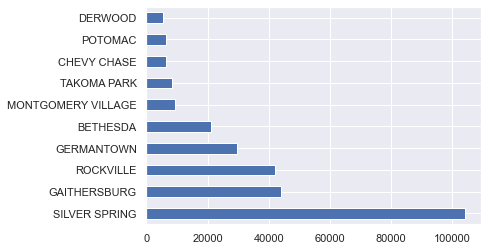

In [14]:
df['City'].value_counts().head(10).plot(kind='barh')

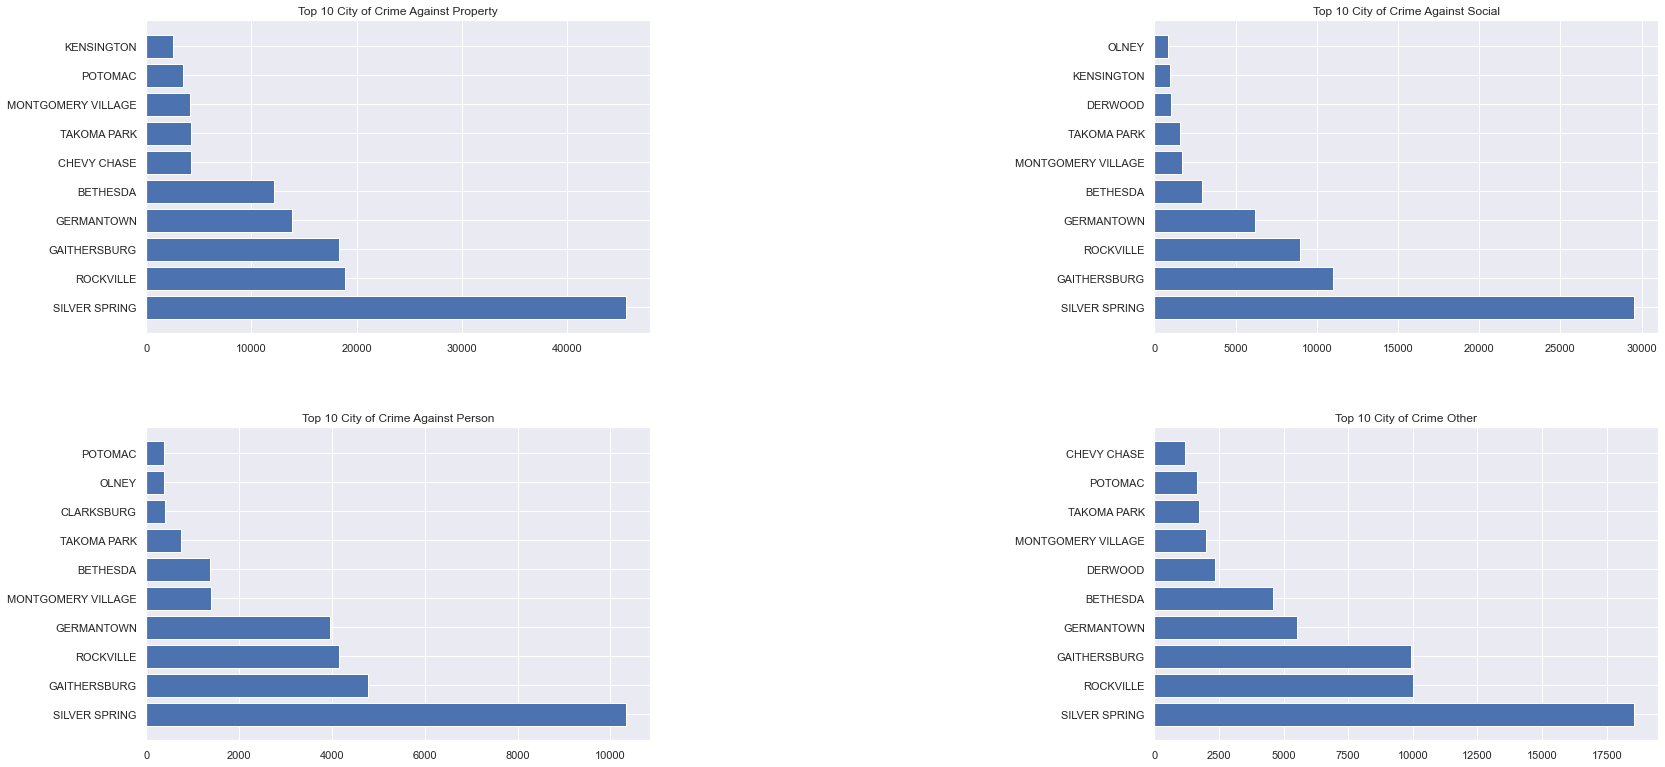

In [15]:
capcty = Crime_Against_Property['City'].value_counts().head(10)
cascty = Crime_Against_Society['City'].value_counts().head(10)
otcty = Other['City'].value_counts().head(10)
capercty = Crime_Against_Person['City'].value_counts().head(10)

capcty = pd.DataFrame(capcty)
cascty = pd.DataFrame(cascty)
otcty = pd.DataFrame(otcty)
capercty = pd.DataFrame(capercty)

figure, axis = plt.subplots(2, 2)

axis[0, 0].barh(capcty.index, capcty['City'])
axis[0, 0].set_title('Top 10 City of Crime Against Property')
#axis[0, 1].tick_params(labelrotation=90)

axis[0, 1].barh(cascty.index, cascty['City'])
axis[0, 1].set_title('Top 10 City of Crime Against Social')
#axis[0, 2].tick_params(labelrotation=90)

axis[1, 0].barh(capercty.index, capercty['City'])
axis[1, 0].set_title('Top 10 City of Crime Against Person')
#axis[1, 0].tick_params(labelrotation=90)

axis[1, 1].barh(otcty.index, otcty['City'])
axis[1, 1].set_title('Top 10 City of Crime Other')
#axis[1, 1].tick_params(labelrotation=90)

plt.subplots_adjust(left=0, bottom=0.5,right=3.5,top=3,wspace=1,hspace=0.3)
plt.show()

#### Analisa pada Kota tempat kegiatan kriminal
Silver Spring, Gaithersburg, Rockville, Germantown, dan Bethesda menjadi kota teratas dalam jumlah kegiatan kriminal   
##### 5 kota dengan kriminal terbanyak berdasarkan jenis krimnal   
Crime Against Property  
Silver Spring, Rockville, Gaithersburg, Germantown, Bethesda  
Crime Against Society  
Silver Spring, Gaithersburg, Rockville, Germantown, Bethesda  
Crime Against Person  
Silver Spring, Gaithersburg, Rockville, Germantown, Montgomery Village  
Other  
Silver Spring, Rockville, Gaithersburg, Germantown, Bethesda  


# Tempat Kegiatan Kriminal

<AxesSubplot:>

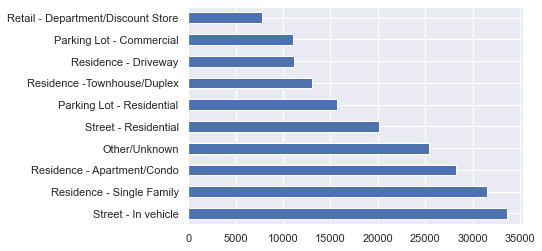

In [16]:
df['Place'].value_counts().head(10).plot(kind='barh')

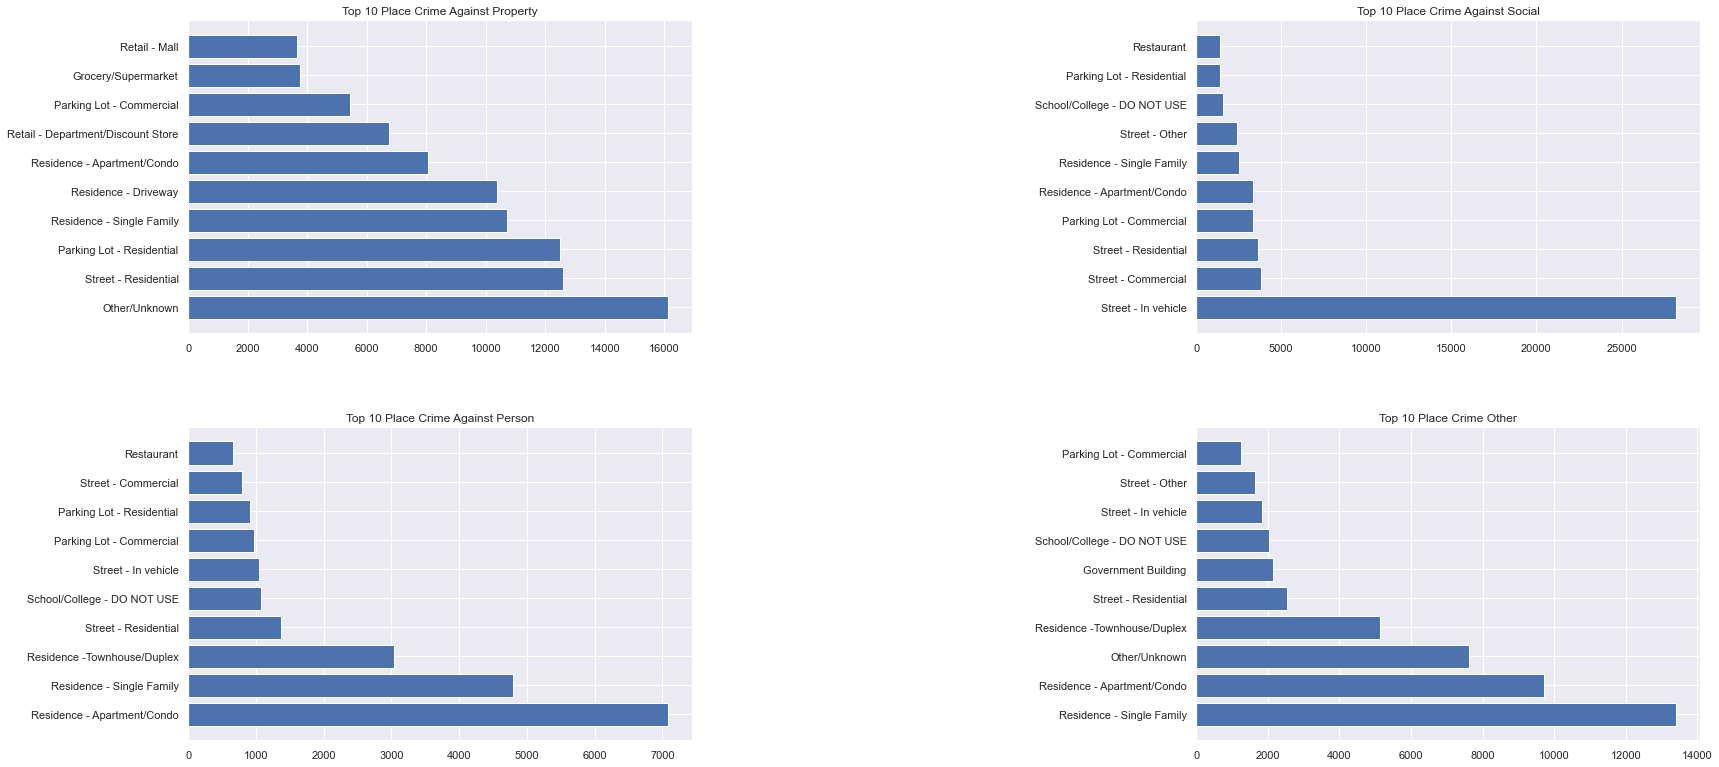

In [17]:
capplc = Crime_Against_Property['Place'].value_counts().head(10)
casplc = Crime_Against_Society['Place'].value_counts().head(10)
otplc = Other['Place'].value_counts().head(10)
caperplc = Crime_Against_Person['Place'].value_counts().head(10)

capplc = pd.DataFrame(capplc)
casplc = pd.DataFrame(casplc)
otplc = pd.DataFrame(otplc)
caperplc = pd.DataFrame(caperplc)

figure, axis = plt.subplots(2, 2)

axis[0, 0].barh(capplc.index, capplc['Place'])
axis[0, 0].set_title('Top 10 Place Crime Against Property')
#axis[0, 1].tick_params(labelrotation=90)

axis[0, 1].barh(casplc.index, casplc['Place'])
axis[0, 1].set_title('Top 10 Place Crime Against Social')
#axis[0, 2].tick_params(labelrotation=90)

axis[1, 0].barh(caperplc.index, caperplc['Place'])
axis[1, 0].set_title('Top 10 Place Crime Against Person')
#axis[1, 0].tick_params(labelrotation=90)

axis[1, 1].barh(otplc.index, otplc['Place'])
axis[1, 1].set_title('Top 10 Place Crime Other')
#axis[1, 1].tick_params(labelrotation=90)

plt.subplots_adjust(left=0, bottom=0.5,right=3.5,top=3,wspace=1,hspace=0.3)
plt.show()

In [32]:
otplc.head()

,Place
Residence - Single Family,13406
Residence - Apartment/Condo,9713
Other/Unknown,7612
Residence -Townhouse/Duplex,5128
Street - Residential,2532


#### Analisa pada tempat kegiatan kriminal dilakukan
Street (In vehicle), Residence (Single Family), Residence (Apartment/Condo), Other/Unknown, dan Street (Residential)  menjadi tempat paling sering terjadi kegiatan kriminal   
##### 5 paling sering terjadi kriminal berdasarkan jenis krimnal   
Crime Against Property :  
Other/Unknown, Street (Residential), Parking Lot (Residential), Residence (Single Family), Residence (Driveway)  
Crime Against Society :  
Street (In vehicle), Street (Commercial), Street (Residential), Parking Lot (Commercial), Residence (Apartment/Condo)   
Crime Against Person :  
Residence (Apartment/Condo), Residence (Single Family), Residence (Townhouse/Duplex), Street (Residential), School/College (DO NOT USE)  
Other :  
Residence (Single Family), Residence (Apartment/Condo), Other/Unknown, Residence (Townhouse/Duplex), Street (Residential)   

# Bulan Paling rawan terjadi tindak kejahatan kriminal

<AxesSubplot:>

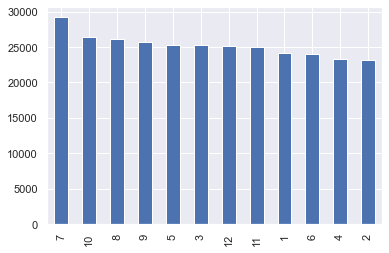

In [33]:
df['Month'].value_counts().plot(kind='bar')

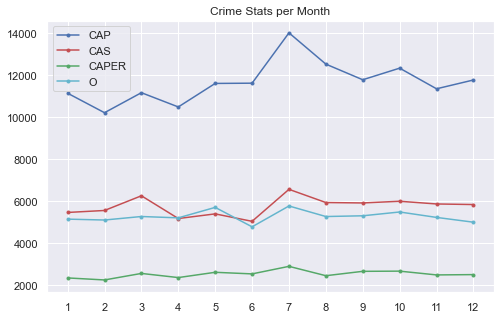

In [34]:
capmon = Crime_Against_Property.groupby('Month').sum().sort_values('Month', ascending=True).reset_index()[['Month','count']]
casmon = Crime_Against_Society.groupby('Month').sum().sort_values('Month', ascending=True).reset_index()[['Month','count']]
capermon = Crime_Against_Person.groupby('Month').sum().sort_values('Month', ascending=True).reset_index()[['Month','count']]
otmon = Other.groupby('Month').sum().sort_values('Month', ascending=True).reset_index()[['Month','count']]

plt.figure(figsize=(8,5))
plt.title('Crime Stats per Month')
plt.plot(capmon['Month'],capmon['count'],'b.-', label='CAP')
plt.plot(casmon['Month'],casmon['count'],'r.-', label='CAS')
plt.plot(capermon['Month'],capermon['count'],'g.-', label='CAPER')
plt.plot(otmon['Month'],otmon['count'],'c.-', label='O')
plt.legend()
plt.xticks(capmon.Month)
plt.show()

In [44]:
otmon.sort_values('count', ascending = False)

,Month,count
6,7,5764
4,5,5697
9,10,5478
8,9,5297
2,3,5263
7,8,5262
10,11,5220
3,4,5199
0,1,5138
1,2,5096


#### Analisa bulan paling rawan terjadi tindak kriminal
bulan 7 menjadi bulan paling sering terjadi kegiatan kriminal dengan lebih dari 29000 kasus, di ikuti dengan bulan ke 10 dan 8 dengan lebih dari 26000 kasus, dan bulan ke 9 dan ke 5 dengan lebih dari 25000 kasus
##### bulan paling rawan terjadi tindak kriminal berdasarkan jenis krimnal   
Crime Against Property :  
posisi pertama ditempati bulan ke 7 dengan sekitar 14000 kasus, selanjutnya bulan ke 8 dan 10 dengan sekitar 12000 kasus, dan bulan 9, 12, 6, 5, 11, 3, dan 1 dengan sekitar 11000 kasus  
Crime Against Society :  
posisi pertama ditempati bulan ke 7 dengan sekitar 6000 kasus, selanjutnya bulan ke 3 dengan sekitar 6000 kasus, dan bulan lainya dengan sekitar 5000 kasus     
Crime Against Person :  
posisi pertama ditempati bulan ke 7 dengan sekitar 2800 kasus, selanjutnya bulan ke 10, 9, dan 5 dengan sekitar 2600 kasus, dan bulan 3, dan 6 dengan sekitar 2500 kasus  
Other :  
posisi pertama ditempati bulan ke 7 dengan sekitar 5700 kasus, selanjutnya bulan ke 5 dengan sekitar 5600 kasus, dilanjutkan bulan 10 dengan sekitar 5400 kasus, dan bulan 9, 3, dan 8 dengan 5200 kasus   

# Tanggal Paling rawan terjadi tindak kejahatan kriminal

In [46]:
df['Date'] = df['Date'].astype(str)
def get_time(date):
    return date.split('-')[2]
df['Date'] = df['Date'].apply(lambda x:f"{get_time(x)}")

C:\Users\HP\AppData\Local\Temp\ipykernel_9708\3839978624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].astype(str)
C:\Users\HP\AppData\Local\Temp\ipykernel_9708\3839978624.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(lambda x:f"{get_time(x)}")


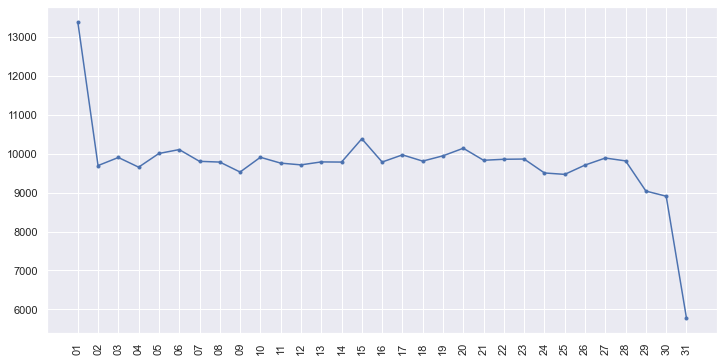

In [48]:
date = df.groupby(['Date',]).sum().sort_values('Date').reset_index()[['Date','count']]
date
plt.figure(figsize=(12,6))
plt.plot(date['Date'],date['count'],'b.-')
plt.xticks(rotation=90);

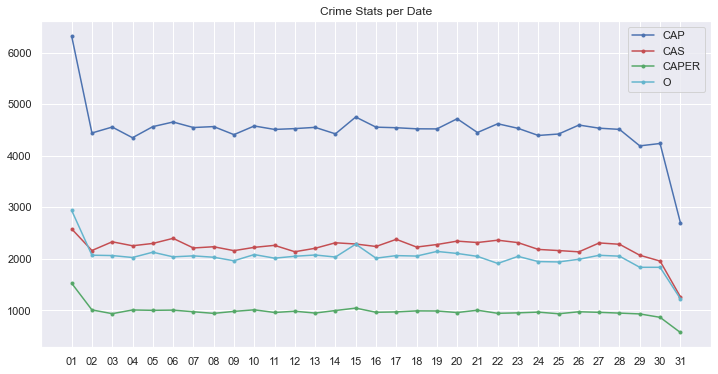

In [49]:
dateall = df.groupby(['Date','Crime Name1']).sum().sort_values('Date').reset_index()[['Crime Name1','Date','count']]
plt.figure(figsize=(12,6))
plt.title('Crime Stats per Date')
plt.plot(dateall[dateall['Crime Name1'] == 'Crime Against Property']['Date'],dateall[dateall['Crime Name1'] == 'Crime Against Property']['count'],'b.-', label='CAP')
plt.plot(dateall[dateall['Crime Name1'] == 'Crime Against Society']['Date'],dateall[dateall['Crime Name1'] == 'Crime Against Society']['count'],'r.-', label='CAS')
plt.plot(dateall[dateall['Crime Name1'] == 'Crime Against Person']['Date'],dateall[dateall['Crime Name1'] == 'Crime Against Person']['count'],'g.-', label='CAPER')
plt.plot(dateall[dateall['Crime Name1'] == 'Other']['Date'],dateall[dateall['Crime Name1'] == 'Other']['count'],'c.-', label='O')
plt.legend()
plt.show()

#### Analisa tanggal paling rawan terjadi tindak kriminal
angka kriminal paling tertinggi terjadi pada tanggal 1 dan kemudian menurun pada tanggal 2 kemudian peningkatan terjadi lagi pada tanggal 15, dan turun menjadi stabil, kemudian sampai akhirnya angka kriminal paling rendah pada tanggal 31
##### bulan paling rawan terjadi tindak kriminal berdasarkan jenis krimnal   
Crime Against Property :  
tanggal 1 menjadi tanggal dengan angka kriminal tertinggi dengan lebih dari 6000 kasus, di ikuti tanggal 15 dan 20 dengan lebih dari 4700 kasus, dan ada tanggal 6 dan 22 dengan lebih dari 4600 kasus. kemudian tanggal 31 menjadi tanggal dengan angka kriminal terendah dengan 2700 kasus  
Crime Against Society :  
tanggal 1 menjadi tanggal dengan angka kriminal tertinggi dengan lebih dari 2600 kasus, di ikuti tanggal 6, 17, 22, 20, 03, dan 21 dengan lebih dari 2300 kasus. kemudian tanggal 31 menjadi tanggal dengan angka kriminal terendah dengan 1265 kasus       
Crime Against Person :  
tanggal 1 menjadi tanggal dengan angka kriminal tertinggi dengan lebih dari 1500 kasus, di ikuti tanggal 15, 10, 2, dan 4 dengan lebih dari 1000 kasus. kemudian tanggal 31 menjadi tanggal dengan angka kriminal terendah dengan 572 kasus  
Other :  
tanggal 1 menjadi tanggal dengan angka kriminal tertinggi dengan lebih dari 2900 kasus, di ikuti tanggal 15 dengan lebih dari 2200 kasus, dan ada tanggal 9, 5, dan 20 dengan lebih dari 2100 kasus. kemudian tanggal 31 menjadi tanggal dengan angka kriminal terendah dengan 1227 kasus   

# Hari Paling rawan terjadi tindak kejahatan kriminal

<AxesSubplot:>

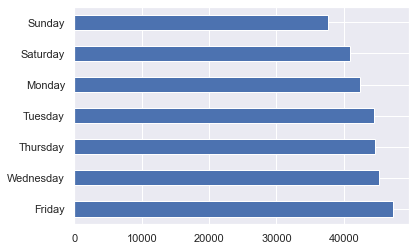

In [67]:
df['Day'].value_counts().head(10).plot(kind='barh')

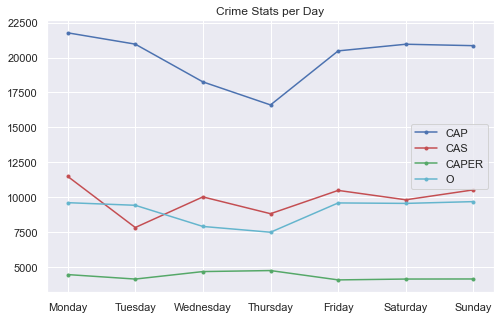

In [20]:
capday = Crime_Against_Property.groupby('Day').sum().reset_index()[['Day','count']]
casday = Crime_Against_Society.groupby('Day').sum().reset_index()[['Day','count']]
caperday = Crime_Against_Person.groupby('Day').sum().reset_index()[['Day','count']]
otday = Other.groupby('Day').sum().reset_index()[['Day','count']]

plt.figure(figsize=(8,5))
plt.title('Crime Stats per Day')
Dayname = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.plot(Dayname,capday['count'],'b.-', label='CAP')
plt.plot(Dayname,casday['count'],'r.-', label='CAS')
plt.plot(Dayname,caperday['count'],'g.-', label='CAPER')
plt.plot(Dayname,otday['count'],'c.-', label='O')
plt.legend()
plt.xticks(Dayname)
plt.show()

#### Analisa hari paling rawan terjadi tindak kriminal
angka kriminal paling tertinggi terjadi pada hari Jumat di ikuti hari rabu, kamis, selasa, dan senin, kejahatan kriminal paling sedikit terjadi saat weekend(sabtu dan minggu)
##### bulan paling rawan terjadi tindak kriminal berdasarkan jenis krimnal   
Crime Against Property :  
hari jumat menjadi hari dengan angka kriminal tertinggi, di ikuti hari senin, dan sabtu, dan hari rabu menjadi hari dengan angka kriminal paling rendah untuk kriminal terhadap properti  
Crime Against Society :  
hari jumat menjadi hari dengan angka kriminal tertinggi, di ikuti hari senin, dan sabtu, dan hari rabu menjadi hari dengan angka kriminal paling rendah untuk kriminal terhadap sosial        
Crime Against Person :  
hari jumat menjadi hari dengan angka kriminal tertinggi, di ikuti hari senin, dan sabtu, dan hari rabu menjadi hari dengan angka kriminal paling rendah untuk kriminal terhadap orang   
Other :  
hari jumat menjadi hari dengan angka kriminal tertinggi, di ikuti hari senin, dan sabtu, dan hari rabu menjadi hari dengan angka kriminal paling rendah untuk kriminal lainya       

# Jam Paling rawan terjadi tindak kejahatan kriminal

<AxesSubplot:>

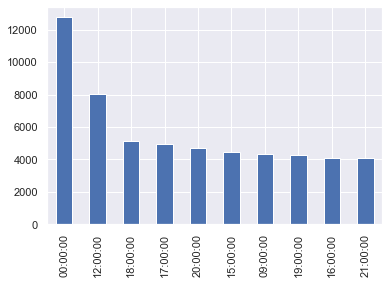

In [76]:
df['Time'].value_counts().head(10).plot(kind='bar')

In [22]:
capti = Crime_Against_Property.groupby('Time').sum().sort_values('count', ascending=False).reset_index()[['Time','count']].head(10)
capti['Time'] = capti['Time'].astype(str)

casti = Crime_Against_Society.groupby('Time').sum().sort_values('count', ascending=False).reset_index()[['Time','count']].head(10)
casti['Time'] = casti['Time'].astype(str)

caperti = Crime_Against_Person.groupby('Time').sum().sort_values('count', ascending=False).reset_index()[['Time','count']].head(10)
caperti['Time'] = caperti['Time'].astype(str)

otti = Other.groupby('Time').sum().sort_values('count', ascending=False).reset_index()[['Time','count']].head(10)
otti['Time'] = capti['Time'].astype(str)

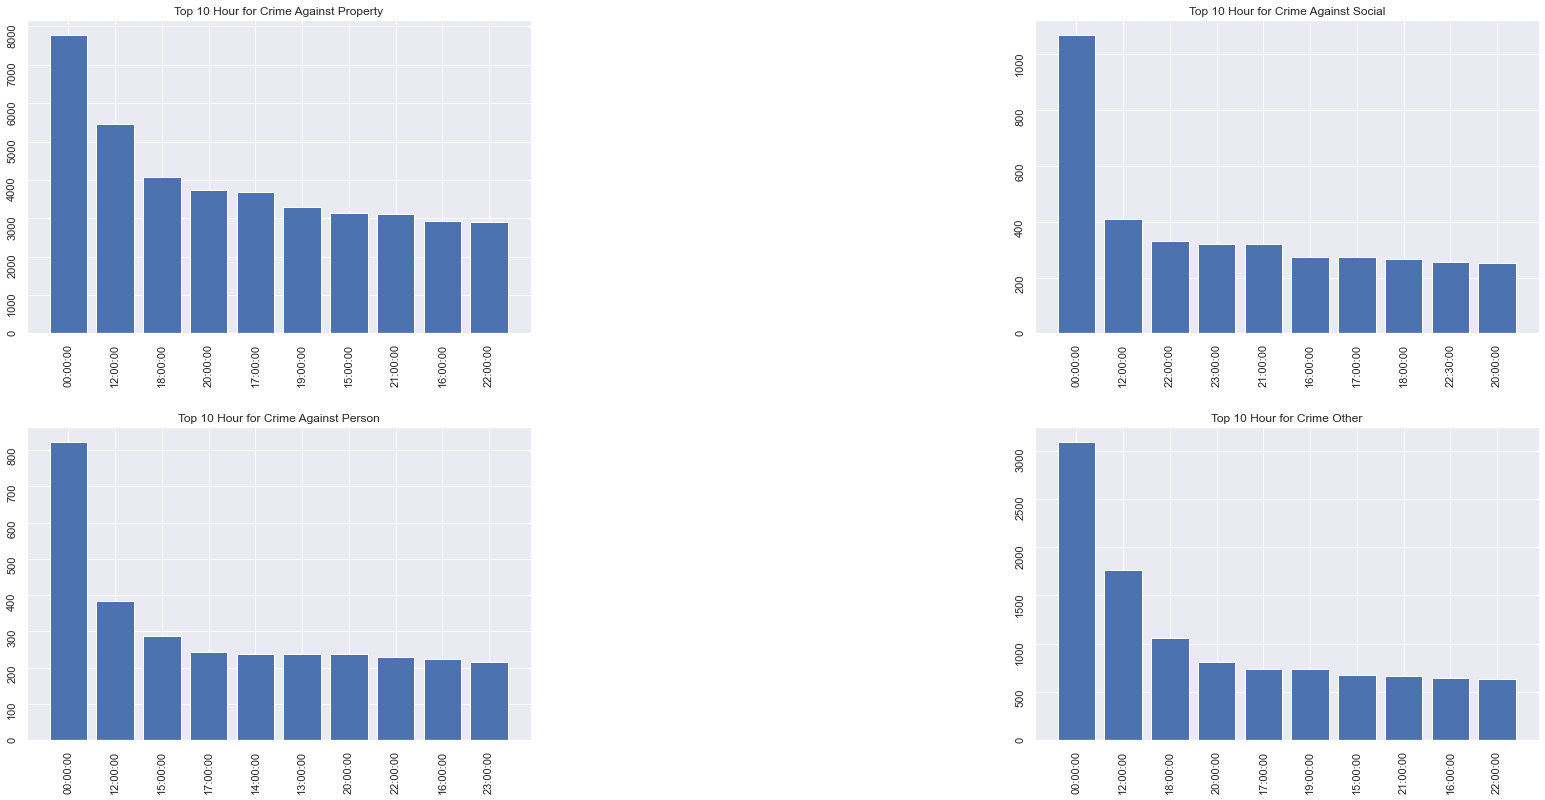

In [23]:
figure, axis = plt.subplots(2, 2)

axis[0, 0].bar(capti['Time'], capti['count'])
axis[0, 0].set_title('Top 10 Hour for Crime Against Property')
axis[0, 0].tick_params(labelrotation=90)

axis[0, 1].bar(casti['Time'], casti['count'])
axis[0, 1].set_title('Top 10 Hour for Crime Against Social')
axis[0, 1].tick_params(labelrotation=90)

axis[1, 0].bar(caperti['Time'], caperti['count'])
axis[1, 0].set_title('Top 10 Hour for Crime Against Person')
axis[1, 0].tick_params(labelrotation=90)

axis[1, 1].bar(otti['Time'], otti['count'])
axis[1, 1].set_title('Top 10 Hour for Crime Other')
axis[1, 1].tick_params(labelrotation=90)

plt.subplots_adjust(left=0, bottom=0.5,right=3.5,top=3,wspace=1,hspace=0.3)

plt.show()

In [74]:
otti

,Time,count
0,00:00:00,3088
1,12:00:00,1762
2,18:00:00,1062
3,20:00:00,813
4,17:00:00,742
5,19:00:00,734
6,15:00:00,672
7,21:00:00,667
8,16:00:00,642
9,22:00:00,635


#### Analisa jam paling rawan terjadi tindak kriminal
angka kriminal paling tertinggi terjadi pada jam 00:00 dini hari dengan 12769 kasus, di ikuti jam 12:00 siang hari dengan 8016 kasus, jam 18:00 dengan 5141 kasus, dan jam 17:00 dengan 4956 kasus
##### bulan paling rawan terjadi tindak kriminal berdasarkan jenis krimnal   
Crime Against Property :  
jam paling rawan kriminal terhadap properti terjadi pada jam 00:00 dini hari, 12:00 siang hari, 18:00, 20:00, dan 17:00  
Crime Against Society :  
jam paling rawan kriminal terhadap sosial terjadi pada jam 00:00 dini hari, 12:00 siang hari, 22:00, 23:00, dan 21:00       
Crime Against Person :  
jam paling rawan kriminal terhadap orang terjadi pada jam 00:00 dini hari, 12:00 siang hari, 15:00, 17:00, dan 14:00  
Other :  
jam paling rawan kriminal terhadap orang terjadi pada jam 00:00 dini hari, 12:00 siang hari, 18:00, 20:00, dan 17:00       

# Jam Paling rawan terjadi tindak kejahatan kriminal

In [24]:
df['Duration'].mean()

Timedelta('6 days 23:41:15.597404409')

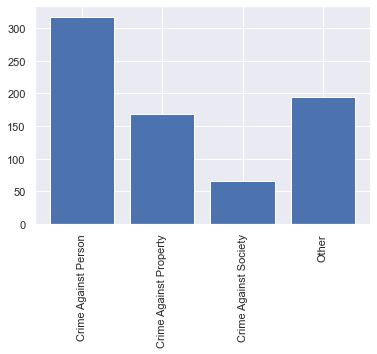

In [25]:
duration = df.groupby('Crime Name1')['Duration'].mean().reset_index()[['Crime Name1','Duration']]
duration['Duration'] = duration['Duration'].astype(str)

def get_time(duration):
    return duration.split('.')[0].split(':')[0]
duration['Duration'] = duration['Duration'].apply(lambda x:f"{get_time(x)}")

duration_in_hour = duration['Duration'].str.split('days').apply(lambda x: int(x[0])*24 + int(x[1]))

duration['duration in hour'] = duration_in_hour

plt.bar(duration['Crime Name1'], duration['duration in hour'])
plt.xticks(rotation=90)
plt.show()

In [75]:
duration

,Crime Name1,Duration,duration in hour
0,Crime Against Person,13 days 06,318
1,Crime Against Property,7 days 00,168
2,Crime Against Society,2 days 18,66
3,Other,8 days 03,195


#### Analisa durasi tindak kriminal
Rata rata durasi dalam tindak kriminal adalah 6 hari 23 jam
##### durasi tindak kriminal berdasarkan jenis krimnal   
Crime Against Property :  
tindak kriminal terhadap properti memiliki rata rata durasi 168 jam  
Crime Against Society :  
tindak kriminal terhadap sosial memiliki rata rata durasi 66 jam       
Crime Against Person :  
tindak kriminal terhadap orang memiliki rata rata durasi 318 jam    
Other :  
tindak kriminal lainya memiliki rata rata durasi 195 jam   